# Spearmans's correlation coefficient

The Spearman's correlation function in scores calculates the Spearmans's correlation coefficient. Spearman's correlation is almost identical to Pearson's correlation when the relationship is linear. They diverge when the function is not linear as Spearman's correlation assesses monotic functions whereas Pearson's correlation assesses strictly linear functions. Recommend reading the wikipedia for more information.

In [7]:
from scores.continuous import mse
from scores.continuous.correlation import spearmanr, pearsonr

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr

np.random.seed(42)  # Ensures consistent values across notebook runs

## Monotonic Correlation

In [8]:
# Generate monotonic function data
np.random.seed(42)
x_monotonic = np.arange(100)
y_monotonic = np.log1p(x_monotonic) + np.random.normal(scale=0.1, size=100)  # Logarithmic relationship with noise

# Generate linear data
x_linear = np.linspace(0, 10, 100)
y_linear = 3 * x_linear + np.random.normal(scale=0.5, size=100)  # Linear relationship with noise

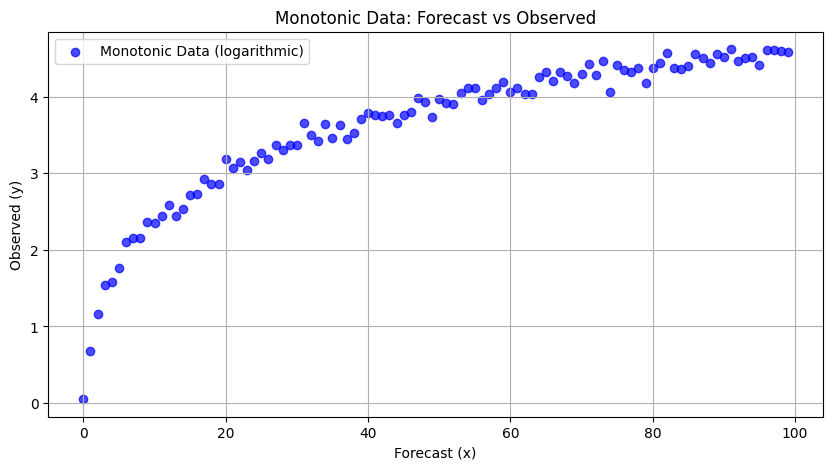

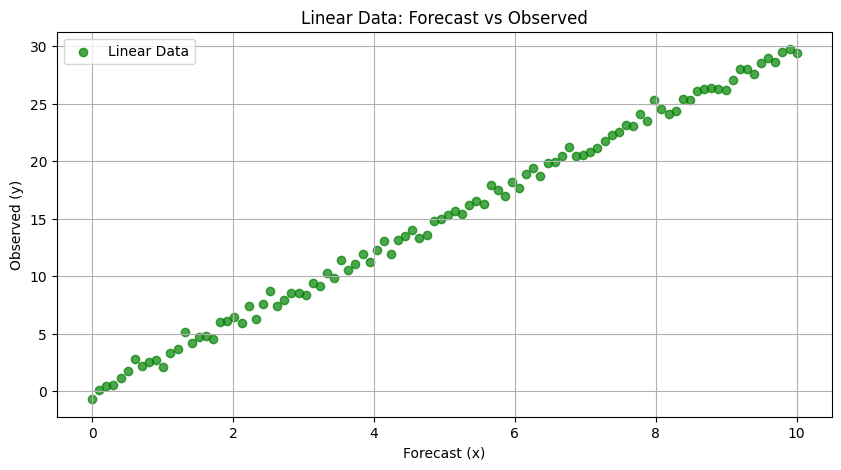

In [9]:
import matplotlib.pyplot as plt

# Plot monotonic data
plt.figure(figsize=(10, 5))
plt.scatter(x_monotonic, y_monotonic, label="Monotonic Data (logarithmic)", color="blue", alpha=0.7)
plt.title("Monotonic Data: Forecast vs Observed")
plt.xlabel("Forecast (x)")
plt.ylabel("Observed (y)")
plt.legend()
plt.grid()
plt.show()

# Plot linear data
plt.figure(figsize=(10, 5))
plt.scatter(x_linear, y_linear, label="Linear Data", color="green", alpha=0.7)
plt.title("Linear Data: Forecast vs Observed")
plt.xlabel("Forecast (x)")
plt.ylabel("Observed (y)")
plt.legend()
plt.grid()
plt.show()


In [10]:
# Convert to xarray.DataArray
fcst_monotonic = xr.DataArray(x_monotonic, dims="time", name="forecast")
obs_monotonic = xr.DataArray(y_monotonic, dims="time", name="observed")

fcst_linear = xr.DataArray(x_linear, dims="time", name="forecast")
obs_linear = xr.DataArray(y_linear, dims="time", name="observed")

# Pearson and Spearman Correlation for Monotonic Data
spearman_monotonic = spearmanr(fcst_monotonic, obs_monotonic, reduce_dims="time")
pearson_monotonic = xr.corr(fcst_monotonic, obs_monotonic, dim="time")

# Pearson and Spearman Correlation for Linear Data
spearman_linear = spearmanr(fcst_linear, obs_linear, reduce_dims="time")
pearson_linear = xr.corr(fcst_linear, obs_linear, dim="time")

In [11]:
# Print results - note that due to the noise the correlations are not 1.
print("Monotonic Data:")
print(f"Spearman Correlation: {spearman_monotonic.values}")
print(f"Pearson Correlation: {pearson_monotonic.values}")

print("\nLinear Data:")
print(f"Spearman Correlation: {spearman_linear.values}")
print(f"Pearson Correlation: {pearson_linear.values}")


Monotonic Data:
Spearman Correlation: 0.986078607860786
Pearson Correlation: 0.8989931737820369

Linear Data:
Spearman Correlation: 0.9984398439843984
Pearson Correlation: 0.9985333442912309


**For the monotonic data:**

Spearman Correlation:
    Spearman's correlation evaluates the monotonic relationship by ranking the data. Even though the relationship is not strictly linear, the ranks of the forecast (x_monotonic) and observed (y_monotonic) values maintain a consistent monotonic trend. Hence, Spearman's correlation should return a high score close to 1, reflecting this strong monotonic association.

Pearson Correlation:
    Pearson's correlation measures linearity, and because the monotonic data is logarithmic (non-linear), the Pearson correlation value is expected to be lower than the Spearman correlation. It still may be moderately high if the log curve resembles a linear trend within the range of the data.

**For the linear data:**

Spearman Correlation:
    Since linearity inherently satisfies monotonicity, the ranks align perfectly, leading to a Spearman correlation very close to 1.

Pearson Correlation:
    The linear relationship fits Pearson's requirements exactly, so the Pearson correlation should also be very close to 1. Any deviation is caused by the noise added to the data.

## xr.Dataset example

In [14]:
# Example with xr.Dataset
dataset_fcst = xr.Dataset({"var1": fcst_linear, "var2": fcst_monotonic})
dataset_obs = xr.Dataset({"var1": obs_linear, "var2": obs_monotonic})

spearman_dataset = spearmanr(dataset_fcst, dataset_obs, reduce_dims="time")
print("\nDataset Spearman Correlations:")
print(spearman_dataset)


Dataset Spearman Correlations:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    var1     float64 8B 0.9984
    var2     float64 8B 0.9861


# References

As we can see Pearson's aims to measure a linear relationship between the data, whereas Spearman's doesn't mind, so long as it is monotonic. For more information see https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

Spearman, C. (1904). The Proof and Measurement of Association between Two Things. The American Journal of Psychology, 15(1), 72–101.
        https://doi.org/10.2307/1412159